 <div class="alert alert-info">
<h1><center><font color=darkblue> CORONARY HEART DISEASE PREDICTION  .<font></center></h1>


</div>

## <font color=RoyalBlue>Introduction<font>

World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardio vascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

## <font color=RoyalBlue>Data Preparation<font>

### <font color=CornflowerBlue>Source:<font>

The dataset is publically available on the Kaggle website, and it is from an  ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.  The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [2]:
heart_df=pd.read_csv("CHD_preprocessed.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### <font color=CornflowerBlue>Variables :<font>

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

 - **<font color=SteelBlue>Demographic:<font>**
sex: male or female;(Nominal)

    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 - **<font color=SteelBlue>Behavioural<font>**

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)

    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

 - **<font color=SteelBlue>Medical( history):<font>**

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)

    -  diabetes: whether or not the patient had diabetes (Nominal)

 - **<font color=SteelBlue>Medical(current):<font>** 

    -  totChol: total cholesterol level (Continuous)

    -  sysBP: systolic blood pressure (Continuous)

    -  diaBP: diastolic blood pressure (Continuous)

    -  BMI: Body Mass Index (Continuous)

    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    -  glucose: glucose level (Continuous)


 - **<font color=SteelBlue>Predict variable (desired target):<font>**

    -  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [3]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [4]:
heart_df.shape

(4133, 15)

   -  The data have 4133 records and 15 features

### <font color=CornflowerBlue>Missing values<font>

In [5]:
heart_df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


In [7]:
heart_df.dropna(axis=0,inplace=True)

## <font color=RoyalBlue>Exploratory Analysis<font>

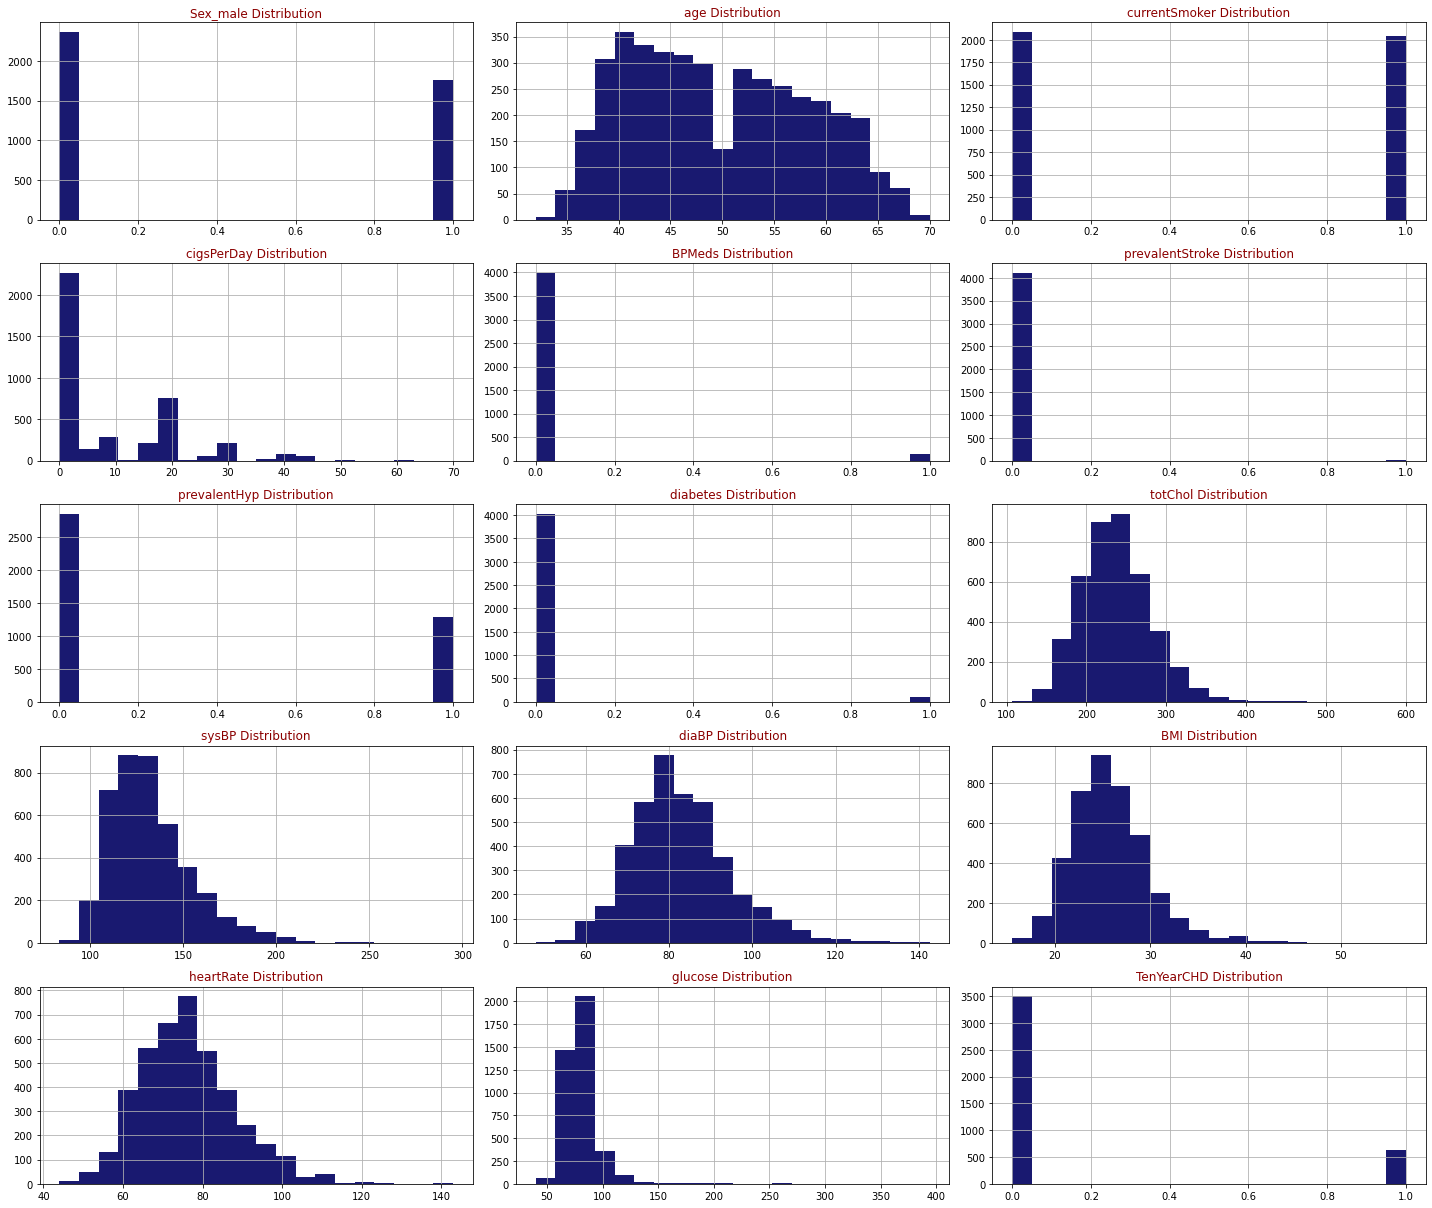

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [9]:
heart_df.TenYearCHD.value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

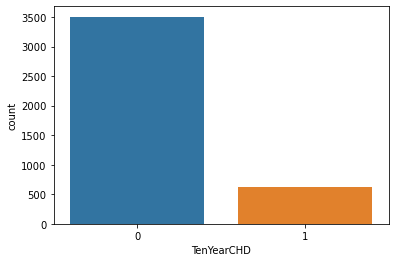

In [10]:
sn.countplot(x='TenYearCHD',data=heart_df)

There are 3179 patents with no heart disease and 572 patients with risk of heart disease.

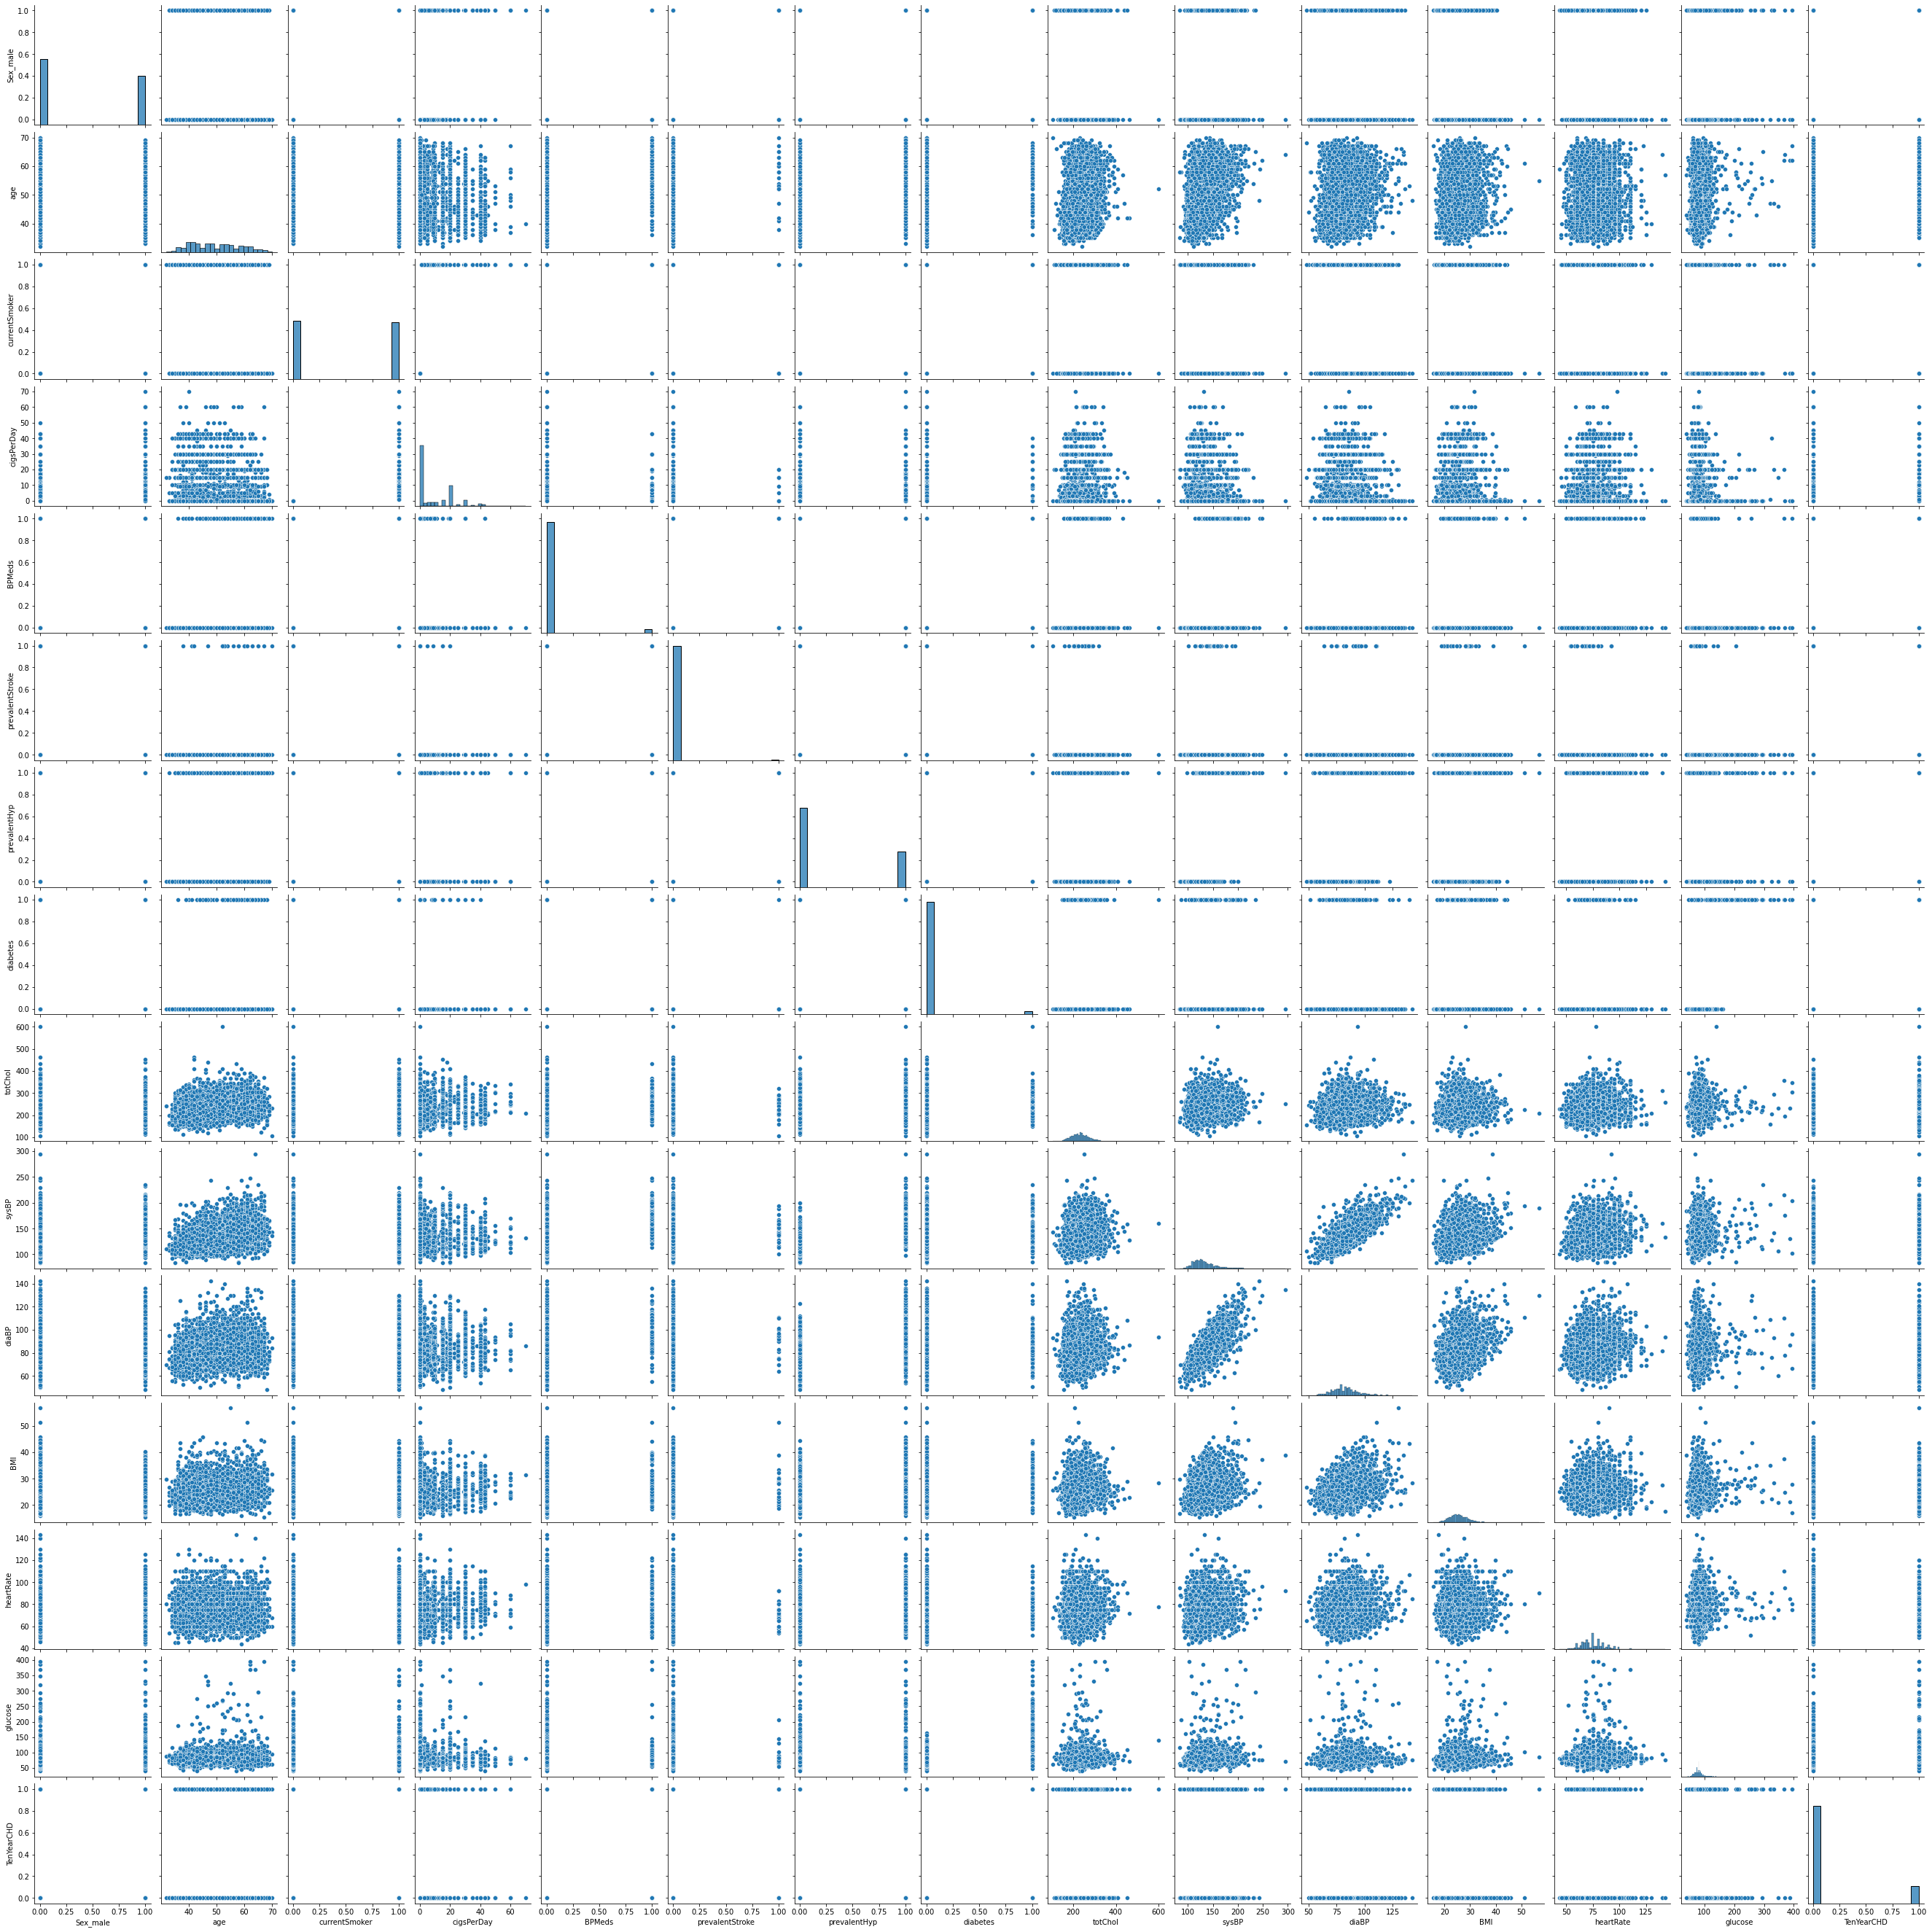

In [11]:
sn.pairplot(data=heart_df)

In [12]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## <font color=RoyalBlue>Logistic Regression<font>

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success. 

In [13]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.378677
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4118
Method:                           MLE   Df Model:                           14
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.1112
Time:                        12:02:30   Log-Likelihood:                -1565.1
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                 6.841e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9942      0.650    -12.295      0.000      -9.269      -6.720
Sex_male            0.4871      0.102      4.785      0.000       0.288       0.687
age                 0.0625      0.006      9.985      0.000       0.050       0.075
currentSmoker       0.0143      0.147      0.097      0.923      -0.274       0.303
cigsPerDay          0.0204      0.006      3.491      0.000       0.009       0.032
BPMeds              0.2199      0.207      1.063      0.288      -0.185       0.625
prevalentStroke     0.9527      0.442      2.154      0.031       0.086       1.819
prevalentHyp        0.2467      0.130      1.895      0.058      -0.008       0.502
diabetes            0.2372      0.297      0.800      0.424      -0.344       0.819
totChol             0.0018      0.001      1.722      0.085      -0.000       0.004
sysBP               0.0145      0.004      4.068      0.000       0.008       0.021
diaBP              -0.0036      0.006     -0.606      0.544      -0.015       0.008
BMI                 0.0018      0.012      0.150      0.881      -0.021       0.025
heartRate          -0.0024      0.004     -0.602      0.547      -0.010       0.005
glucose             0.0062      0.002      2.877      0.004       0.002       0.010
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing  low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by  running the regression repeatedly until all attributes have P Values less than 0.05.



### <font color=CornflowerBlue>Feature Selection: Backward elemination (P-value approach)<font>

In [15]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4126
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.1086
Time:                        12:03:45   Log-Likelihood:                -1569.7
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                 1.677e-79
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4592      0.394    -21.477      0.000      -9.231      -7.687
Sex_male            0.4670      0.098      4.745      0.000       0.274       0.660
age                 0.0654      0.006     10.883      0.000       0.054       0.077
cigsPerDay          0.0206      0.004      5.263      0.000       0.013       0.028
prevalentStroke     1.0375      0.436      2.379      0.017       0.183       1.892
sysBP               0.0171      0.002      8.474      0.000       0.013       0.021
glucose             0.0073      0.002      4.407      0.000       0.004       0.010
===================================================================================
"""

#### <font color=darkblue>Logistic regression equation<font>

$$P=\hspace{.2cm}e^{\beta_0 + \beta_1 X_1}\hspace{.2cm}/\hspace{.2cm}1+e^{\beta_0 +\beta_1 X_1}$$

When all features plugged in:

$$logit(p) = log(p/(1-p))=\beta_0 +\beta_1\hspace{.1cm} *\hspace{.2cm} Sexmale\hspace{.2cm}+\beta_2\hspace{.1cm} * \hspace{.1cm}age\hspace{.2cm}+\hspace{.2cm}\beta_3\hspace{.1cm} *\hspace{.1cm} cigsPerDay\hspace{.2cm}+\hspace{.2cm}\beta_4 \hspace{.1cm}*\hspace{.1cm} totChol\hspace{.2cm}+\hspace{.2cm}\beta_5\hspace{.1cm} *\hspace{.1cm} sysBP\hspace{.2cm}+\hspace{.2cm}\beta_6\hspace{.1cm} *\hspace{.1cm} glucose\hspace{.2cm}$$



## <font color=RoyalBlue>Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues<font>

In [17]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000459    0.000212   0.000
Sex_male             1.315341       1.934682    1.595232   0.000
age                  1.055079       1.080223    1.067577   0.000
cigsPerDay           1.013006       1.028661    1.020803   0.000
prevalentStroke      1.200474       6.634497    2.822152   0.017
sysBP                1.013237       1.021286    1.017253   0.000
glucose              1.004041       1.010548    1.007289   0.000


 - **This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of  females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.**
<br>
<br>

 - **The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.**
<br>
<br>
 - **Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.** 
<br>
<br>
 - **For Total cholosterol level and glucose level there is no significant change.**
<br>
<br>
 - **There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.**


### <font color=CornflowerBlue>Splitting data to train and test split<font>

In [19]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

## <font color=RoyalBlue>Model Evaluation<font>

### <font color=CornflowerBlue>Model accuracy<font>

In [21]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8645707376058042

####  <font color=DarkBlue>Accuracy of the model is 0.88<font>

### <font color=CornflowerBlue>Confusion matrix<font>

<AxesSubplot:>

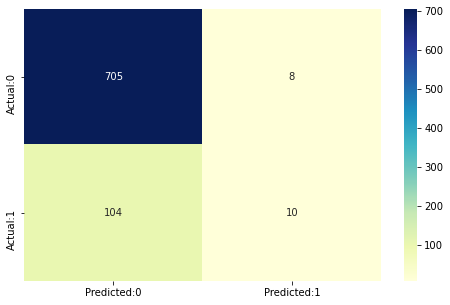

In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

**<font color=DarkBlue>True Positives:**  4<font>

**<font color=DarkBlue>True Negatives:**  658<font>

**<font color=DarkBlue>False Positives:** 1 (*Type I error*)<font>

**<font color=DarkBlue>False Negatives:** 88 ( *Type II error*)<font>

In [23]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

### <font color=CornflowerBlue>Model Evaluation - Statistics<font>

In [25]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8645707376058042 
 The Missclassification = 1-Accuracy =  0.13542926239419584 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.08771929824561403 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9887798036465638 
 Positive Predictive value = TP/(TP+FP) =  0.5555555555555556 
 Negative predictive Value = TN/(TN+FN) =  0.8714462299134734 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.817982456140351 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9226328231927335


**From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.**

### <font color=CornflowerBlue>Predicted probabilities of  0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes)  for the test data with a default classification threshold of 0.5<font>


In [26]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.917263,0.082737
1,0.732035,0.267965
2,0.918748,0.081252
3,0.943520,0.056480
4,0.805169,0.194831


### <font color=CornflowerBlue>Lower the threshold<font>

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this case. Hence inorder to increase the sensitivity,  threshold can be lowered.

In [27]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[304 409]
 [ 13 101]] 
 with 405 correct predictions and 13 Type II errors( False Negatives) 

 Sensitivity:  0.8859649122807017 Specificity:  0.426367461430575 



With 0.2 threshold the Confusion Matrix is  
 [[567 146]
 [ 52  62]] 
 with 629 correct predictions and 52 Type II errors( False Negatives) 

 Sensitivity:  0.543859649122807 Specificity:  0.7952314165497896 



With 0.3 threshold the Confusion Matrix is  
 [[647  66]
 [ 79  35]] 
 with 682 correct predictions and 79 Type II errors( False Negatives) 

 Sensitivity:  0.30701754385964913 Specificity:  0.9074333800841514 



With 0.4 threshold the Confusion Matrix is  
 [[690  23]
 [ 94  20]] 
 with 710 correct predictions and 94 Type II errors( False Negatives) 

 Sensitivity:  0.17543859649122806 Specificity:  0.967741935483871 





C:\Users\MK PERUMALLA\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\MK PERUMALLA\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\MK PERUMALLA\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\MK PERUMALLA\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass thresho

### <font color=CornflowerBlue>ROC curve<font>

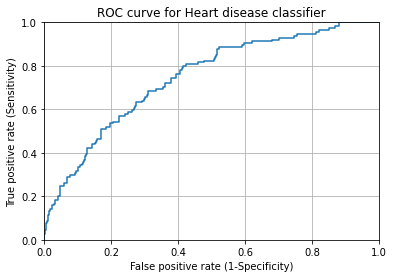

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate (# true positives/ total # positives) versus the false positive rate (# false positives /
total # negatives) for all possible choices of thresholds. A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. 

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

### <font color=CornflowerBlue>Area Under The Curve (AUC)<font>

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that  as possible. An area of 1 is ideal. The closer the AUC to 1 the better.

In [29]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7453802809970227


## <font color=RoyalBlue> Conclusions:</font>

<div class="alert alert-info">



<div class="panel-body">


 - **<font color=darkblue>All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.</font>** 
<br>
<br>
 - **<font color=darkblue>Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.</font>**
 <br>
 <br>

 - **<font color=darkblue>Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)</font>**
 <br>
 <br>

 - **<font color=darkblue>The model predicted with 0.88 accuracy. The model is more specific than sensitive.</font>**
 <br>
 <br>

 - **<font color=darkblue>The Area under the ROC curve is 73.5 which is somewhat satisfactory.</font> **
 <br>
 <br>

 - ** <font color=darkblue>Overall model could be improved with more data.</font>**

</div>
</div>

## <font color=RoyalBlue>Appendix

http://www.who.int/mediacentre/factsheets/fs317/en/





In [15]:
i=0
while i<10:
    print(i*"*")
    i+=1


*
**
***
****
*****
******
*******
********
*********


In [ ]:
i=0;j=0;
while i<=5:
    while j<=5:
        print("*")
        j+=1
        
    
        